# Unearthing Astrological Anomalies
## Discovering the Extraordinary in an Unconventional Exploration of Astrological Data

The data collected is from astro.com. Data is cleaned and transformed to a vedic kundali (Astrological Birth chart).
Birth chart calculation is done using swisseph library with Lahiri ayanamsha.
Based on the degrees of planets in the kundali 3 main set of data are extracted:
1. Which Rashi/ astrological sign graha/planet is in
2. Which Bhava/House graha is in
3. Lord of which bhava is placed where

From the same astro.com, categories represented by the event/birthchart is given. That is extacted and given in the dataset.
if a specific category, say for example `Vocation : Entertainment : Actor/ Actress` value is 1, it means the chart is of a person Vocation is Entertainment actresses. if a category is not found in the chart 0 is returned.
If it is of a place/event, generally `mundane` column will be 1.

## Few things about data:

Column descriptions:

| Column Name       | Description                                  |
|-------------------|----------------------------------------------|
| day               | Day of the event                             |
| month             | Event month                                  |
| year              | Year of the event                            |
| hour              | Event hour                                   |
| hourDecimal       | Event hour in decimal format                 |
| dobTz             | Timezone of the event                        |
| dobStr            | Date of birth as a string (for person)        |
| latitude          | Latitude of the event location                |
| longitude         | Longitude of the event location               |
| latitudeStr       | Latitude as a string                          |
| longitudeStr      | Longitude as a string                         |
| prsName           | Name of the person or incident (ex: Vivekananda, Swami in https://www.astro.com/astro-databank/Vivekananda,_Swami)               |
| rating            | Rating of the accuracy of the event data - https://www.astro.com/astro-databank/Help:RR      |
| dirty_calculation | Boolean flag indicating calculation issues    |
|-------------|--------------------------------|
| 1_lord      | Bhava of lord of 1st bhava     |
| 2_lord      | Bhava of lord of 2nd bhava     |
| 3_lord      | Bhava of lord of 3rd bhava     |
| 4_lord      | Bhava of lord of 4th bhava     |
| 5_lord      | Bhava of lord of 5th bhava     |
| 6_lord      | Bhava of lord of 6th bhava     |
| 7_lord      | Bhava of lord of 7th bhava     |
| 8_lord      | Bhava of lord of 8th bhava     |
| 9_lord      | Bhava of lord of 9th bhava     |
| 10_lord     | Bhava of lord of 10th bhava    |
| 11_lord     | Bhava of lord of 11th bhava    |
| 12_lord     | Bhava of lord of 12th bhava    |
|-------------|-----------------------------|
| SY_rashi    | SY placement in rashi       |
| CH_rashi    | CH placement in rashi       |
| BU_rashi    | BU placement in rashi       |
| SK_rashi    | SK placement in rashi       |
| MA_rashi    | MA placement in rashi       |
| GU_rashi    | GU placement in rashi       |
| SA_rashi    | SA placement in rashi       |
| SW_rashi    | SW placement in rashi       |
| SM_rashi    | SM placement in rashi       |
| TE_rashi    | TE placement in rashi       |
| RA_rashi    | RA placement in rashi       |
| KE_rashi    | KE placement in rashi       |
| LG_rashi    | LG placement in rashi       |
|-------------|-----------------------------|
| SY_bhava    | SY placement in bhava       |
| CH_bhava    | CH placement in bhava       |
| BU_bhava    | BU placement in bhava       |
| SK_bhava    | SK placement in bhava       |
| MA_bhava    | MA placement in bhava       |
| GU_bhava    | GU placement in bhava       |
| SA_bhava    | SA placement in bhava       |
| SW_bhava    | SW placement in bhava       |
| SM_bhava    | SM placement in bhava       |
| TE_bhava    | TE placement in bhava       |
| RA_bhava    | RA placement in bhava       |
| KE_bhava    | KE placement in bhava       |

* all the remaining columns are different categories given in https://www.astro.com/astro-databank/Special:Categories
* event can be birth or an incident

# LEGEND:

# some vedic keywords in this data

| Code | VedicName | Planet       |
|------|-----------|--------------|
| SY   | Surya     | Sun          |
| CH   | Chandra   | Moon         |
| BU   | Budha     | Mercury      |
| SM   | Shukra    | Venus        |
| LG   | Lagna     | Ascendant    |
| GU   | Guru      | Jupiter      |
| SA   | Shani     | Saturn       |
| RA   | Rahu      | NorthNode    |
| KE   | Ketu      | SouthNode    |
| SW   | Uranus    | Uranus       |
| SM   | Neptune   | Neptune      |
| TE   | Pluto     | Pluto        |
| MA   | Mangala   | Mars         |

# bhava legend

| Number | house name representation of number       |
|--------|------------|
| 1      | 01_TANU    |
| 2      | 02_DHANA   |
| 3      | 03_SAHAJ   |
| 4      | 04_BHANDU  |
| 5      | 05_PUTRA   |
| 6      | 06_AARI    |
| 7      | 07_YUVATI  |
| 8      | 08_ROGA    |
| 9      | 09_BHAGYA  |
| 10     | 10_KARMA   |
| 11     | 11_LABHA   |
| 12     | 12_VYAYA   |

# rashi/sign legend

| Number | Sign/Rashi        |
|--------|-------------|
| 1      | 01_aries    |
| 2      | 02_taurus   |
| 3      | 03_gemini   |
| 4      | 04_cancer   |
| 5      | 05_leo      |
| 6      | 06_virgo    |
| 7      | 07_libra    |
| 8      | 08_scorpio  |
| 9      | 09_sagittarius |
| 10     | 10_capricorn |
| 11     | 11_aquarius |
| 12     | 12_pisces   |




In [1]:

# import libraries
import numpy as np
from csv import writer
import pandas as pd
import numpy as np
from datetime import datetime
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)




In [2]:
# some settings for notebook
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 15)


# 1. Get data

In [3]:
# read the data file
astro_chart = pd.read_csv('data/05_astro_clean.csv')
astro_chart.tail(2)

,categories,number,Mundane : Disasters : Accidents,Mundane : Disasters : Natural Disasters,Vocation : Writers : Columnist/ journalist,Mundane : Disasters : Deranged Actions,Vocation : Entertain/Music : Instrumentalist,...,8_lord,9_lord,10_lord,11_lord,12_lord,RA_lord,KE_lord
72063,",Notable : Awards : Emmy,Mundane : Misc. Munda...",72063,0,0,0,0,0,...,01_TANU,08_ROGA,08_ROGA,01_TANU,11_LABHA,10-10,7-4
72064,"Vocation : Education : Teacher,Vocation : Ente...",72064,0,0,0,0,0,...,05_PUTRA,02_DHANA,02_DHANA,05_PUTRA,07_YUVATI,10-2,7-8


In [4]:
astro_chart.shape

(72065, 1815)

there are 72065 rows in this data set containing 1815 columns

# 2. Understanding data

<Axes: xlabel='LG_rashi'>

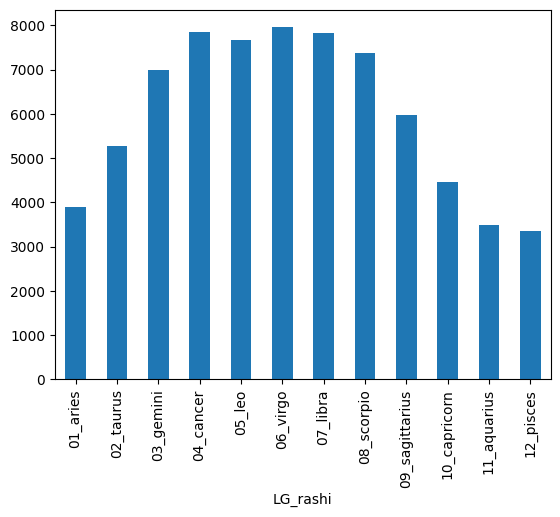

In [5]:
# show chart by sprted labels
astro_chart['LG_rashi'].value_counts().sort_index().plot.bar()

#### this shows that gemini to scorpio has the highest number of acendents, cancer and virgo leading.
- Also based on analysis somehow most of the asendents seem to be in cancer, virgo and libra
- One of the explaination is leo-scorpio are tamasic rashis. So the attention given by the world to such people will be high, and hence such charts are mostly popular enough to be collected
- the fact that the pattern looks increasing hitting the peak in virgo-libra and then going down at piscies is astonishing when we consider the rajasic, tamasic and saatvic behaviours of individuals. Ascendent being there meaning the body representing such quality
- In kalapurusha chart, these are the rashis which fall below throt and above thighs, the largest and main funtions of the body. Hence, these people knowing are unknowingly are contributing to continuation of kala-purusha (time personified) and hence their work is noticiable enough to across time


In [6]:
# read astro_catagories_column into a array
with open('data/04_Archive/04_astro_categories_cols.txt', 'r') as f:
    astro_catagories_column = f.read().splitlines()
astro_catagories_column.remove('categories')
astro_catagories_column.remove('number')
# astro_catagories_column

In [7]:
# top 5 categories which have LG_rashi column as '04_cancer'
# sum all the categorie columns and show the highest which have LG_rashi column as '04_cancer'
astro_chart[astro_chart['LG_rashi'] == '04_cancer'][astro_catagories_column].sum().sort_values(ascending=False).head(5)

Vocation : Entertainment : Actor/ Actress        1078
Personal : Death : Long life more than 80 yrs     806
Family : Parenting : Kids 1-3                     612
Family : Relationship : Number of Marriages       536
Notable : Famous : Top 5% of Profession           510
dtype: int64

In [8]:
astro_chart[astro_chart['LG_rashi'] == '06_virgo'][astro_catagories_column].sum().sort_values(ascending=False).head(5)

Vocation : Entertainment : Actor/ Actress        1170
Personal : Death : Long life more than 80 yrs     869
Family : Relationship : Number of Marriages       613
Family : Parenting : Kids 1-3                     605
Vocation : Entertain/Music : Vocalist/ Pop        533
dtype: int64

notice that because the data is mostly of famous celebrities, top category seems mostly the Actor/ Actress.
So ignoring such larger category, `top 5% profession` is good category for `04_cancer` acendents and `Vocalist/ Pop` is for `06_virgo` acendents

# 3. Data Cleanup

In [9]:
graha_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'L', 'M', 'O']
# // avoiding 'H', 'I', 'J',  -> "SW", "SM", "TE", -> This is not used from vedic astrology. hence ignored in this analysis
graha_cols_new = ['SY', 'CH', 'BU', 'SK', 'MA', 'GU', 'SA', 'RA', 'KE', 'LG']
graha_cols_dict = dict(zip(graha_cols, graha_cols_new))

X_cols_from_astro_chart = [] # All the columns needed for astrological analysis
X_cols_only_rashi = [] # only rashi columns
X_cols_only_bhava = [] # only bhava columns
for col in graha_cols_new:
    X_cols_only_rashi.append(col+'_rashi')
    X_cols_only_bhava.append(col+'_bhava')

X_cols_144_bhava = [] # lords in bhava columns
for col in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]: 
    X_cols_144_bhava.append(str(col)+'_lord')

X_cols_chaya_bhava = ["RA_lord", "KE_lord"] # RA and KE representation of lordship-bhavaPlacement. Needed seperately due to calculation challenges

# remove LG_bhava from X_cols_only_bhava
X_cols_only_bhava.remove('LG_bhava') # LG_bhava (Lagna/Ascendent) will always be 1. Hence removed from the list

X_cols_from_astro_chart = X_cols_only_rashi + X_cols_only_bhava + X_cols_144_bhava + X_cols_chaya_bhava
print(X_cols_from_astro_chart)


['SY_rashi', 'CH_rashi', 'BU_rashi', 'SK_rashi', 'MA_rashi', 'GU_rashi', 'SA_rashi', 'RA_rashi', 'KE_rashi', 'LG_rashi', 'SY_bhava', 'CH_bhava', 'BU_bhava', 'SK_bhava', 'MA_bhava', 'GU_bhava', 'SA_bhava', 'RA_bhava', 'KE_bhava', '1_lord', '2_lord', '3_lord', '4_lord', '5_lord', '6_lord', '7_lord', '8_lord', '9_lord', '10_lord', '11_lord', '12_lord', 'RA_lord', 'KE_lord']


In [10]:
# read astro_catagories_column into a array
with open('data/04_Archive/04_astro_categories_cols.txt', 'r') as f:
    astro_catagories_column = f.read().splitlines()
astro_catagories_column.remove('categories')
astro_catagories_column.remove('number')
# astro_catagories_column

### 3.1 prepration of methods for easy execution of analysis

In [11]:
def printCategoryPercent(data_df, astro_sprit_filtered, y_cols_from_astro3):
    count = 1
    # sort y_cols_from_astro3 by value_counts
    # astro_sprit_filtered[y_cols_from_astro3].sum().sort_values(ascending=False)
    # get sorted columns order by value_counts
    colsto_check = astro_sprit_filtered[y_cols_from_astro3].sum().sort_values(ascending=False).index.tolist()

    for i in  astro_sprit_filtered[colsto_check].columns:
        perc = data_df[i].value_counts()[1] / len(data_df[i] ) * 100
        # only 4 digit after decimal
        perc = "{:.4f}".format(perc)
        print( str(count) + " : count="+str(data_df[i].value_counts()[1]) +', percent =' + str(perc) +"\t : " + i)
        count += 1
        # print(astro3[i].value_counts())
        # print("")

In [12]:
# this function will return a dataframe which will have lord columns and sum of each bhava it is in
def create_actor144(df_actor):
    number_to_bhava_map = {1:"01_TANU",
    2:"02_DHANA",
    3:"03_SAHAJ",
    4:"04_BHANDU",
    5:"05_PUTRA",
    6:"06_AARI",
    7:"07_YUVATI",
    8:"08_ROGA",
    9:"09_BHAGYA",
    10:"10_KARMA",
    11:"11_LABHA",
    12:"12_VYAYA"}

    actor_144 = df_actor[X_cols_144_bhava].apply(pd.Series.value_counts)
    actor_144 = actor_144.fillna(0).astype(int)
    # iterate for each record in df_actor
    for index, row in df_actor.iterrows():
        for each_chaya in X_cols_chaya_bhava:
            lord_bhava = df_actor[each_chaya][index].split("-")
            col = lord_bhava[0]+"_lord"
            row = number_to_bhava_map[int(lord_bhava[1])]
            if row not in actor_144[col].index:
                actor_144.loc[row] = 0

        actor_144[col][row] += 1
        
    return actor_144


In [13]:
# this funtion returns filtered data:
# Rating column represents legend from https://www.astro.com/astro-databank/Help:RR
# To keep it mostly accurate, we will keep only AA and A rated records using rating column
# Will also remove records where the chart calculations were not accurate using dirty_calculation column
def filterHighAccuracyDataForSelectedCategories(data_df, selected_columns):
    print("records before filtering : " + str(data_df[data_df[selected_columns].sum(axis=1) > 0].shape[0]))
    astro_sprit_filtered = data_df[data_df["rating"].isin(["AA", "A"]) & (data_df["dirty_calculation"] == False)][data_df[selected_columns].sum(axis=1) > 0]
    print("records after filtering : " + str(astro_sprit_filtered.shape[0]))
    return astro_sprit_filtered

In [14]:
# get columns with a matching keyword, ignoring the ones with a doesnotContain

def getColumnsWithMatchingKeyword(data_df, keyword, doesnotContain = 'mundane'):
    selected_category_cols = []
    for col_name in data_df.columns:
        col_name_match = col_name.lower()
        if keyword in col_name_match and not doesnotContain in col_name_match:
            selected_category_cols.append(col_name)

    print("Number of columns selected : " + str(len(selected_category_cols)))
    return selected_category_cols

In [15]:
def display3HeatMap(rashi, bhava, lord144, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

    sns.heatmap(rashi, cmap="plasma", annot=True, fmt="d", ax=ax1)
    ax1.set_title("Graha in Rashi")
    sns.heatmap(bhava, cmap="viridis", annot=True, fmt="d", ax=ax2)
    ax2.set_title("Graha in Bhava")
    sns.heatmap(lord144, cmap="cividis", annot=True, fmt="d", ax=ax3)
    ax3.set_title("144 core bhava")
    # limit flot to 2 decimal
    # ax3.set_yticklabels(['{:.2f}'.format(x) for x in ax3.get_yticks()])
    fig.suptitle(title)

    # Do a single heatmap of lord144
    


    # save actor_rashi, actor_bhava and actor_144 as csv
    # rashi.to_csv("actor_rashi_" + title + ".csv", header=True, index=True)
    # bhava.to_csv("actor_bhava_" + title + ".csv", header=True, index=True)
    # lord144.to_csv("actor_144_" + title + ".csv", header=True, index=True)
    plt.show()

    # ax = sns.heatmap(lord144, cmap="cividis", annot=True, fmt="d")
    # ax.set_title("Graha in Bhava")
    # plt.show()

    

In [16]:
def printOutliers(df):
    # Define the percentile thresholds for outliers
    lower_thresholds = df.apply(lambda x: x.quantile(0.05)).sort_values(ascending=True)[0]
    upper_thresholds = df.apply(lambda x: x.quantile(0.95)).sort_values(ascending=False)[0]

    # Apply the outlier mask for each column
    outliers_mask_lower = (df <= lower_thresholds)
    outliers_mask_upper = (df >= upper_thresholds)
    outliers_mask = outliers_mask_lower | outliers_mask_upper

    outliers = df[outliers_mask]

    print(f'Outliers calculation bounds: 5th percentile: {lower_thresholds} --- 95th percentile:{upper_thresholds}\n')
    # loop through each ouliers df on a column and print index and column header where value is number
    for i in outliers.columns:
        # check if there is any value greater than 0 in a column
        if(~(outliers[i].sum() > 0)):
            # print(f"{i} : no outliers")
            continue
        print(f"{i} :")
        for j in outliers_mask_lower.index:
            if(outliers_mask_lower.loc[j,i] > 0):
                print(f'\t{i} : lower : {j} = {outliers.loc[j,i]}')
        for j in outliers_mask_upper.index:
            if(outliers_mask_upper.loc[j,i] > 0):
                print(f'\t{i} : upper : {j} = {outliers.loc[j,i]}')
                


In [17]:
# this will show 3 heatmaps, showing the distribution of rashi, bhava and lords in bhava
def showHeatMap(data_df, keyword, pltTitle):
    # show unique count and value count of rashi in each column where Vocation : Entertainment : Actor/ Actress = 1
    actor = data_df[X_cols_from_astro_chart]
    actor_rashi = actor[X_cols_only_rashi].apply(pd.Series.value_counts)
    # actor_rashi_sum = actor_rashi.sum().rename("rashi count")
    # print("sum of each rashi in "+keyword+" :")
    # print(actor_rashi_sum.to_markdown())
    # print(actor_rashi.to_markdown())

    actor_bhava = actor[X_cols_only_bhava].apply(pd.Series.value_counts)    
    # actor_bhava_sum = actor_bhava.sum().rename("bhava count")
    # print("sum of each bhava in "+keyword+" :")
    # print(actor_bhava_sum.to_markdown())
    # print(actor_bhava.to_markdown())
    
    actor_rashi = actor_rashi.fillna(0).astype(int)
    actor_bhava = actor_bhava.fillna(0).astype(int)
    actor_144 = create_actor144(actor)
    actor_144 = actor_144.fillna(0).astype(int)
    printOutliers(actor_144)
    # actor_144_sum = actor_144.sum().rename("144 count")
    # print("sum of 144 bhava in "+keyword+" :")
    # print(actor_144_sum.to_markdown())
    # print(actor_144.to_markdown())
    # get the highest and lowest value count in each column with column name
    display3HeatMap(actor_rashi, actor_bhava, actor_144, pltTitle)
    # print data points which are outliers

    # pltTitle = "90 and 10 percentile : "+pltTitle
    # # display3HeatMap(actor_rashi_quantile, actor_bhava_quantile, actor_144_quantile, pltTitle)





In [18]:
# For a specific column, show the distribution of rashi, bhava and lords in bhava in a heatmap
def plotHeatmapForEachColumn(astro_sprit_filtered, cols_for_y):
    count = 1
    for col in cols_for_y:
        temp_cols = X_cols_from_astro_chart.copy()
        temp_cols.append(col)
        temp = astro_sprit_filtered[astro_sprit_filtered[col]==1][temp_cols]
        perc = temp[col].value_counts()[1] / len(temp[col] ) * 100
        perc = "{:.4f}".format(perc)
        count += 1
        showHeatMap(temp, col)


In [19]:
def executeAnalysis(data_df, keyword):
    selected_category_cols = getColumnsWithMatchingKeyword(data_df, keyword)
    filtered_data_df = filterHighAccuracyDataForSelectedCategories(data_df, selected_category_cols)
    printCategoryPercent(data_df, filtered_data_df, selected_category_cols)
    allHM_cols = selected_category_cols +  X_cols_from_astro_chart
    print(f" total matching records : ({filtered_data_df.shape[0]}) percentange of DB {filtered_data_df.shape[0] / data_df.shape[0] * 100} %")
    pltTitle = f"'Keyword : {keyword} -- Row count : ({filtered_data_df.shape[0]}) --Percent of DB: {filtered_data_df.shape[0] / data_df.shape[0] * 100} %"
    # pltTitle = 'Keyword : '+keyword + " -- records : " + str(filtered_data_df.shape) +" -- "+ str( '{:.2f}'.format(actor_rashi.sum(axis=0)[0] / astro4.shape[0] * 100)) + "% of DB"
    showHeatMap(filtered_data_df[allHM_cols], keyword, pltTitle)



# 4 Analysis

Number of columns selected : 2
records before filtering : 1205


records after filtering : 1025
1 : count=673, percent =0.9339	 : Diagnoses : Body Part Problems : Accident/Injury
2 : count=562, percent =0.7799	 : Personal : Death : Accidental
 total matching records : (1025) percentange of DB 1.422327065843336 %
Outliers calculation bounds: 5th percentile: 70.2 --- 95th percentile:109.9

2_lord :
	2_lord : upper : 09_BHAGYA = 111.0
5_lord :
	5_lord : upper : 01_TANU = 121.0
9_lord :
	9_lord : lower : 01_TANU = 68.0
	9_lord : upper : 07_YUVATI = 111.0


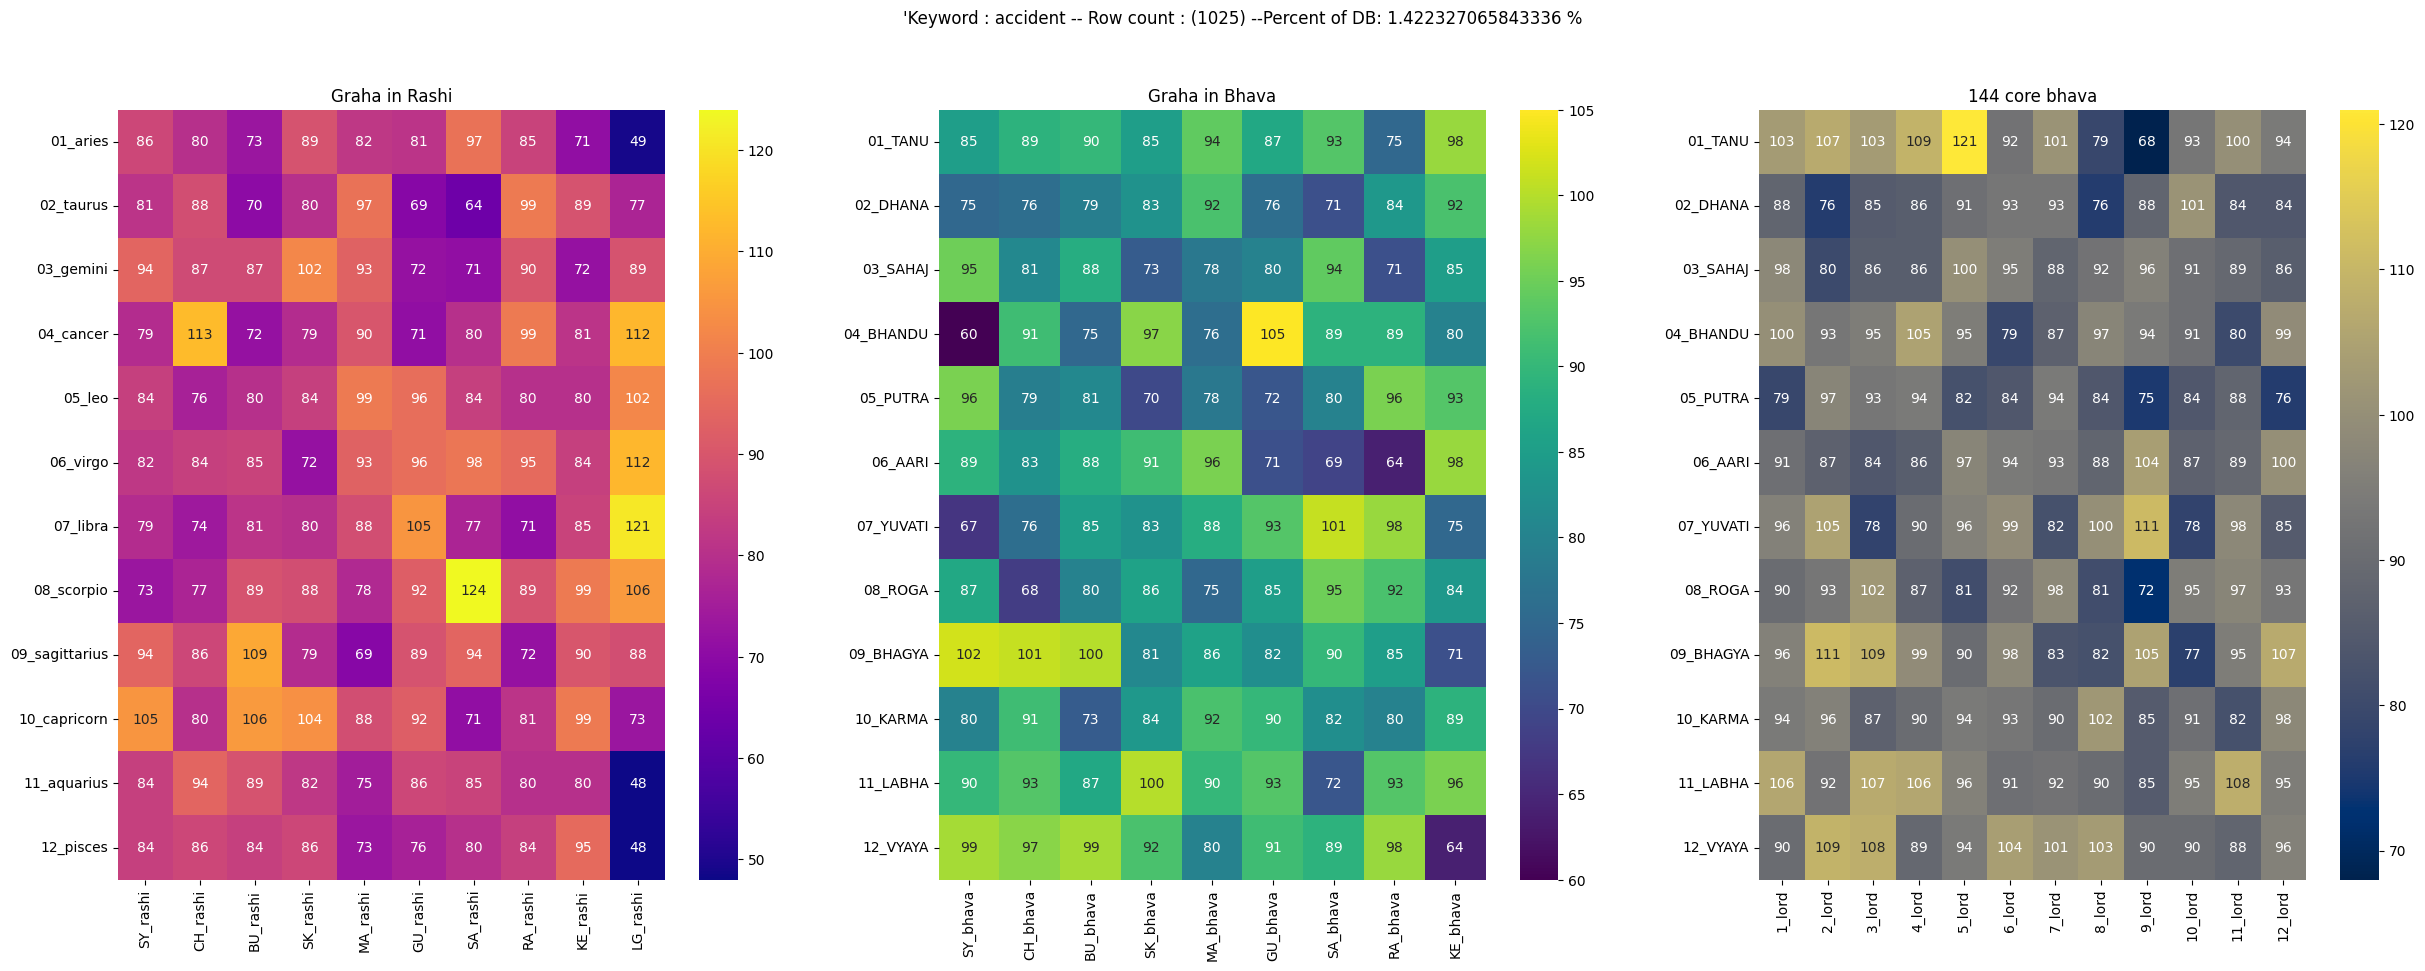

In [20]:
## 4.1 Categories representing accident
executeAnalysis(astro_chart, "accident")


Number of columns selected : 29
records before filtering : 2089
records after filtering : 1641
1 : count=700, percent =0.9713	 : Personal : Religion/Spirituality : Western
2 : count=235, percent =0.3261	 : Vocation : Occult Fields : Psychic/ Medium/ Spiritualist
3 : count=218, percent =0.3025	 : Personal : Religion/Spirituality : Philosopher/ Humanist
4 : count=119, percent =0.1651	 : Personal : Religion/Spirituality : Eastern
5 : count=95, percent =0.1318	 : Personal : Religion/Spirituality : Other Rel/Spirituality
6 : count=89, percent =0.1235	 : Personal : Religion/Spirituality : Metaphysical
7 : count=157, percent =0.2179	 : Vocation : Religion : Spiritual Leader/ Guru
8 : count=81, percent =0.1124	 : Personal : Religion/Spirituality : Conversion/ Born again
9 : count=93, percent =0.1291	 : Personal : Religion/Spirituality : Mystical experience
10 : count=71, percent =0.0985	 : Personal : Religion/Spirituality : Atheist
11 : count=65, percent =0.0902	 : Personal : Religion/Spiritua

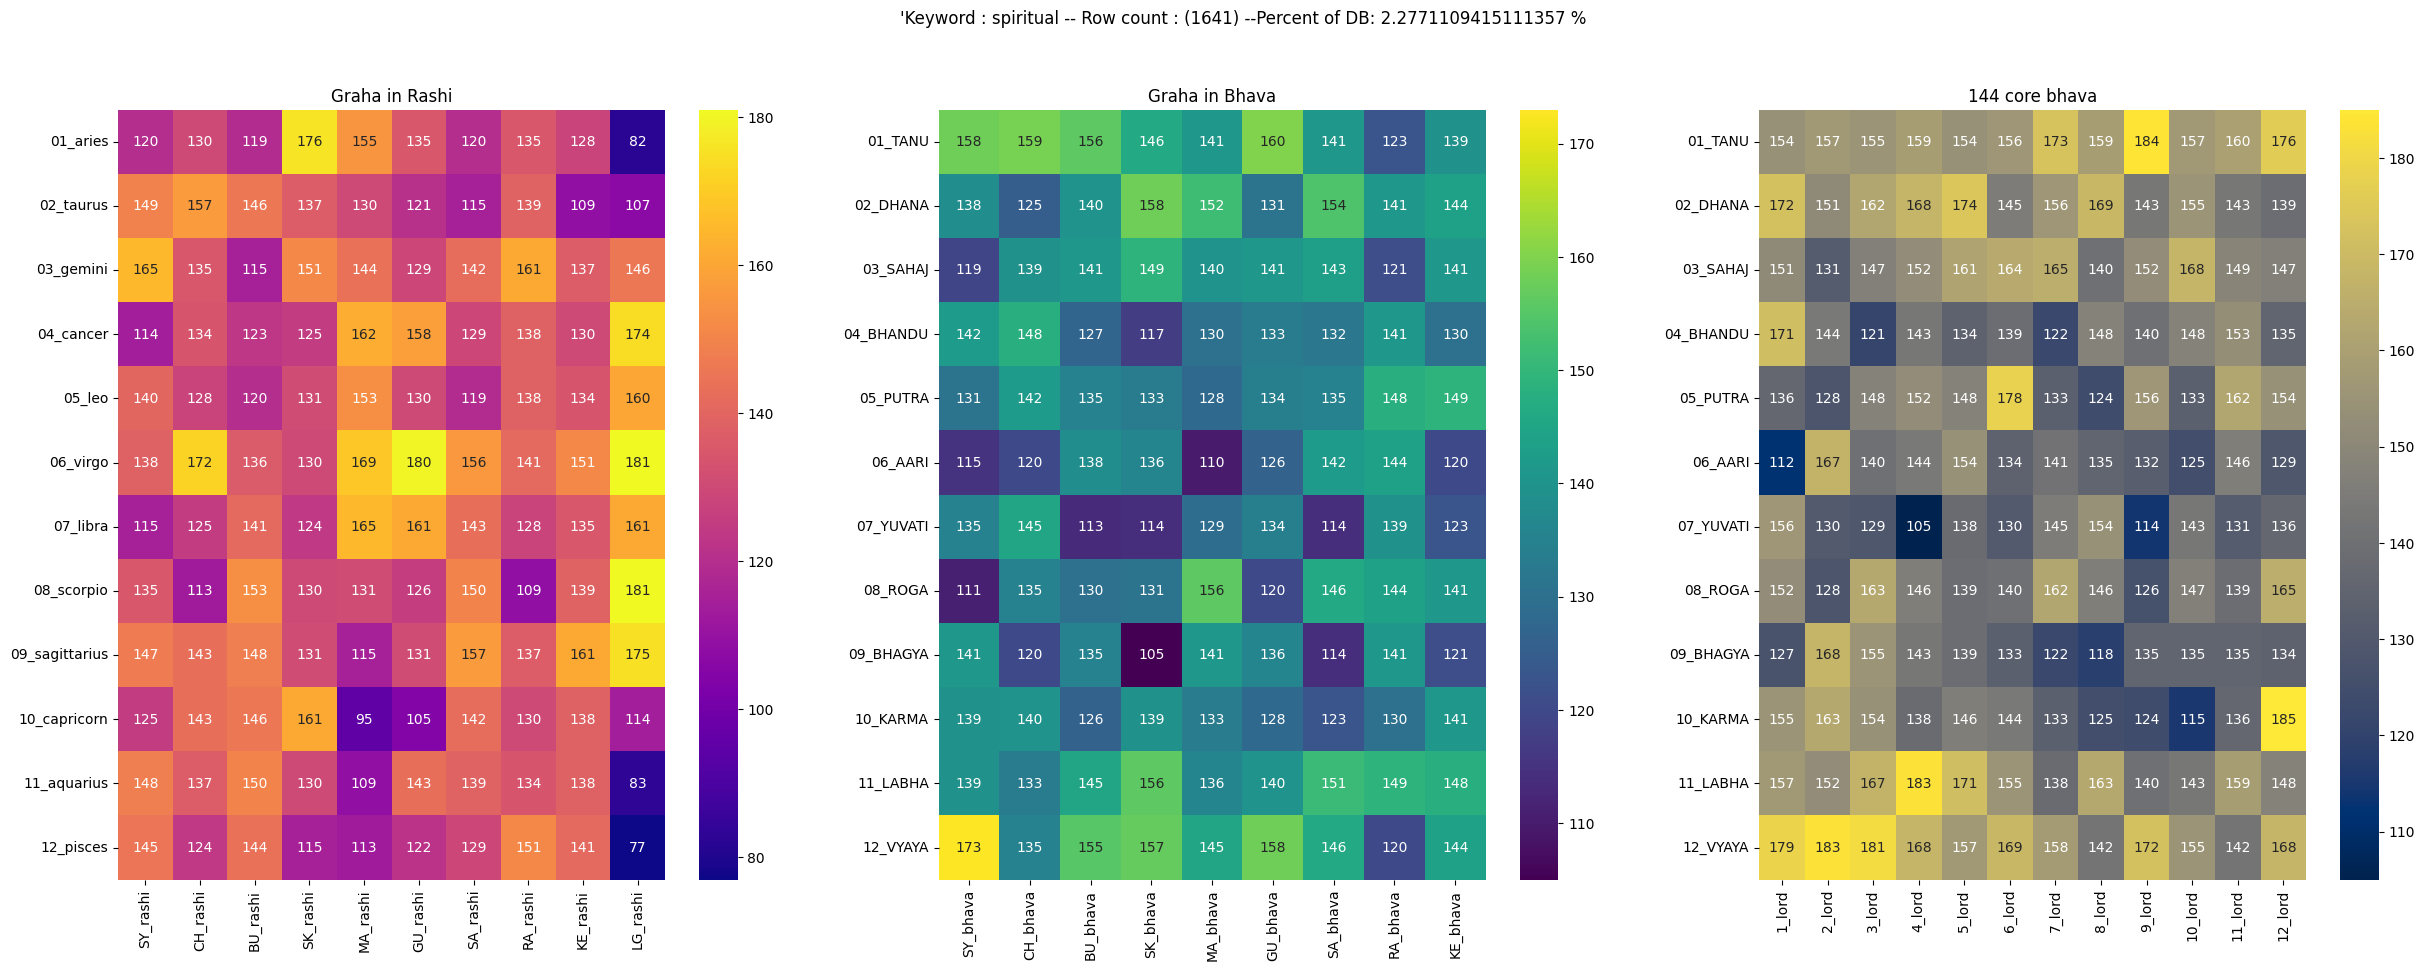

In [21]:
## 4.2 Categories representing spirituality:
executeAnalysis(astro_chart, "spiritual")

Number of columns selected : 1
records before filtering : 216
records after filtering : 160
1 : count=216, percent =0.2997	 : Lifestyle : Financial : Rags to riches
 total matching records : (160) percentange of DB 0.22202178588774024 %
Outliers calculation bounds: 5th percentile: 8.1 --- 95th percentile:22.0

2_lord :
	2_lord : lower : 01_TANU = 7.0
3_lord :
	3_lord : lower : 03_SAHAJ = 8.0
	3_lord : upper : 01_TANU = 22.0
	3_lord : upper : 10_KARMA = 22.0
5_lord :
	5_lord : lower : 06_AARI = 8.0
6_lord :
	6_lord : upper : 10_KARMA = 22.0
7_lord :
	7_lord : lower : 04_BHANDU = 8.0
	7_lord : upper : 05_PUTRA = 22.0
8_lord :
	8_lord : lower : 08_ROGA = 7.0
10_lord :
	10_lord : lower : 06_AARI = 7.0
11_lord :
	11_lord : lower : 07_YUVATI = 8.0
	11_lord : upper : 03_SAHAJ = 22.0


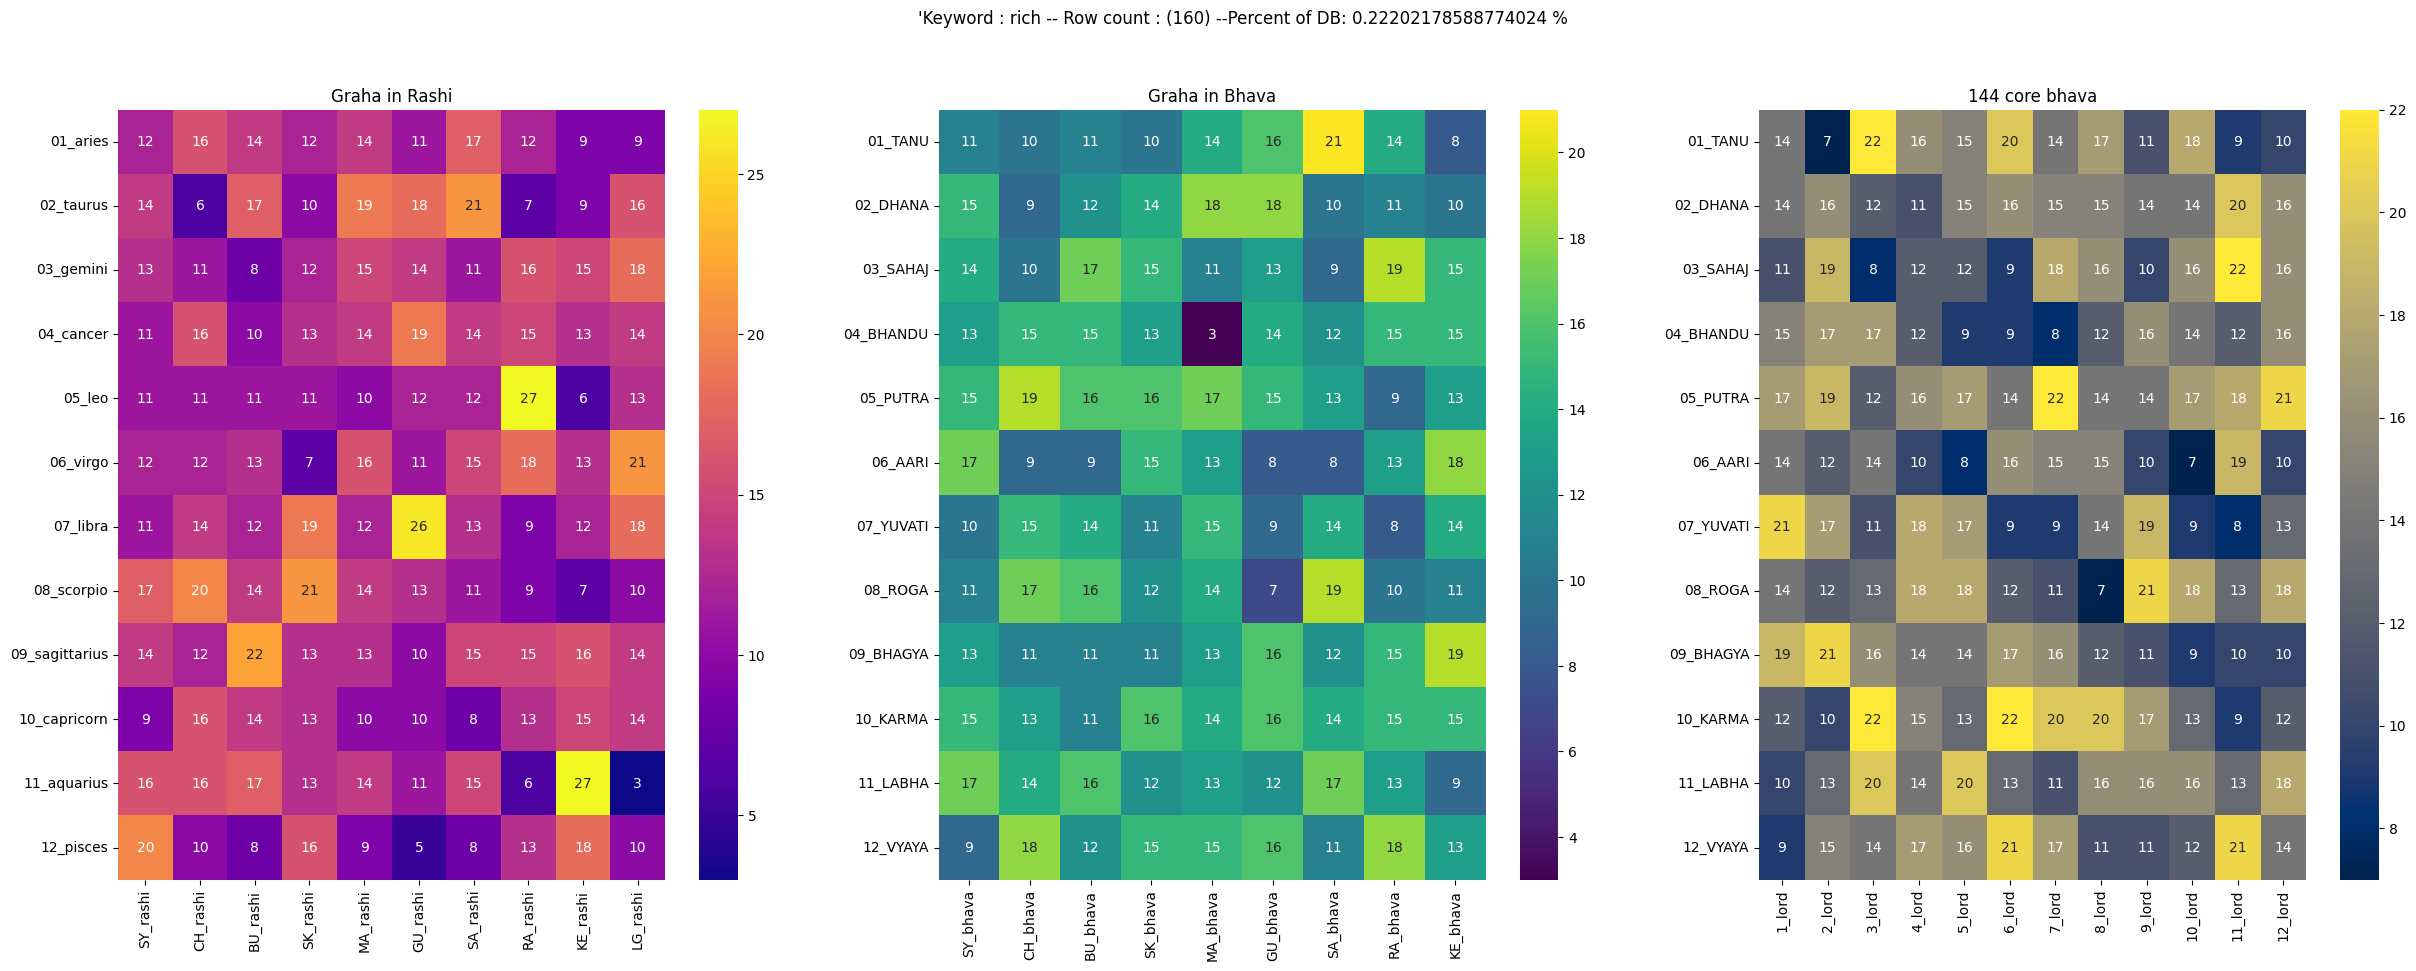

In [22]:
## 4.3 Categories representing richness:
executeAnalysis(astro_chart, "rich")

Number of columns selected : 1
records before filtering : 512
records after filtering : 427
1 : count=512, percent =0.7105	 : Diagnoses : Body Part Problems : Surgery
 total matching records : (427) percentange of DB 0.5925206410879067 %
Outliers calculation bounds: 5th percentile: 28.1 --- 95th percentile:51.25

2_lord :
	2_lord : upper : 12_VYAYA = 56.0
3_lord :
	3_lord : lower : 02_DHANA = 23.0
5_lord :
	5_lord : lower : 02_DHANA = 27.0
	5_lord : upper : 10_KARMA = 58.0
6_lord :
	6_lord : lower : 12_VYAYA = 27.0
8_lord :
	8_lord : lower : 06_AARI = 27.0
9_lord :
	9_lord : upper : 05_PUTRA = 53.0
10_lord :
	10_lord : lower : 04_BHANDU = 27.0
11_lord :
	11_lord : lower : 09_BHAGYA = 28.0
12_lord :
	12_lord : lower : 02_DHANA = 28.0
	12_lord : upper : 11_LABHA = 54.0


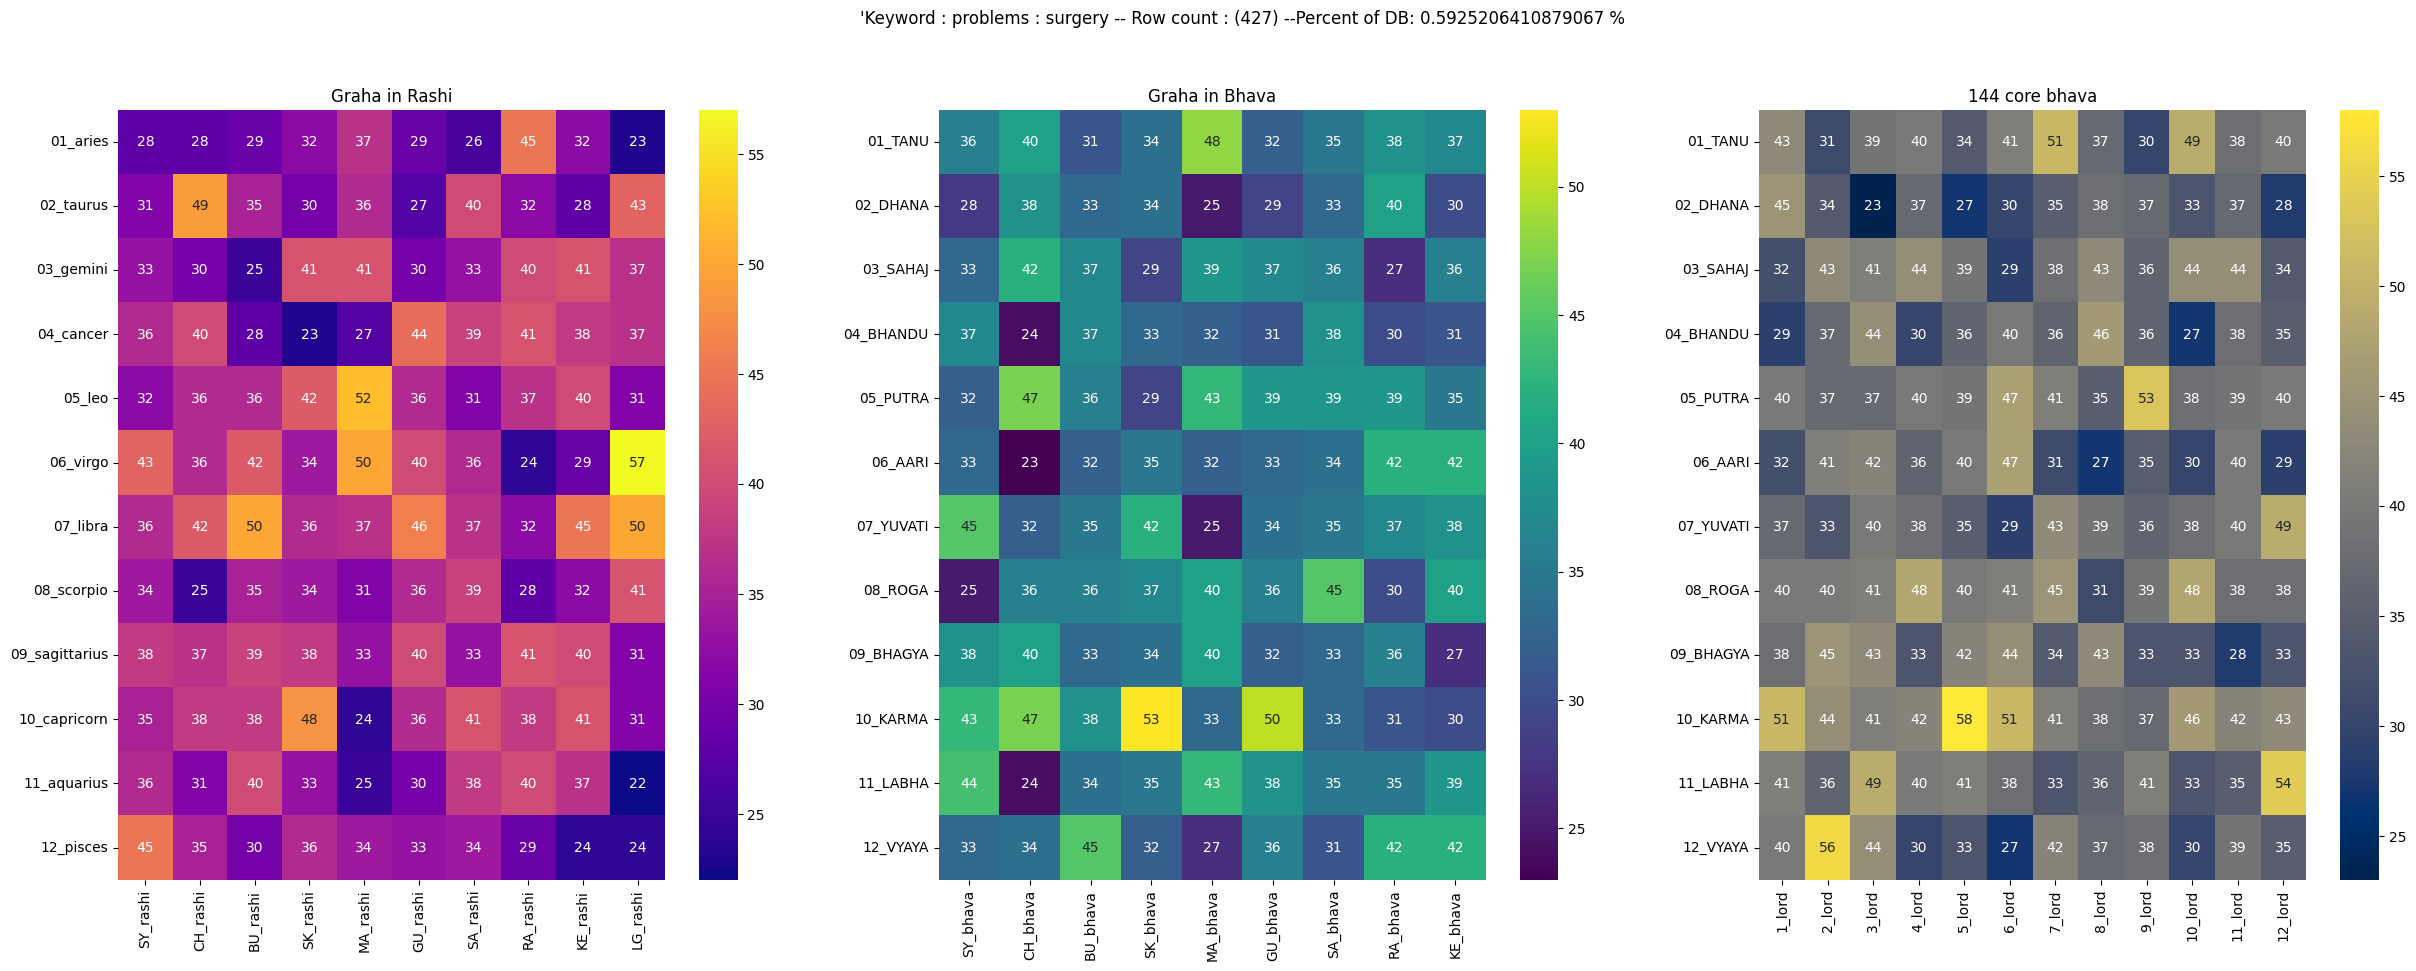

In [23]:
## 4.4 Categories representing surgery
executeAnalysis(astro_chart, "problems : surgery")

Number of columns selected : 1
records before filtering : 10061
records after filtering : 8360
1 : count=10061, percent =13.9610	 : Vocation : Entertainment : Actor/ Actress
 total matching records : (8360) percentange of DB 11.600638312634427 %
Outliers calculation bounds: 5th percentile: 677.35 --- 95th percentile:855.8

1_lord :
	1_lord : upper : 11_LABHA = 871.0
2_lord :
	2_lord : upper : 12_VYAYA = 885.0
3_lord :
	3_lord : upper : 12_VYAYA = 858.0
4_lord :
	4_lord : lower : 04_BHANDU = 663.0
	4_lord : upper : 12_VYAYA = 879.0
10_lord :
	10_lord : lower : 12_VYAYA = 676.0
11_lord :
	11_lord : lower : 09_BHAGYA = 668.0


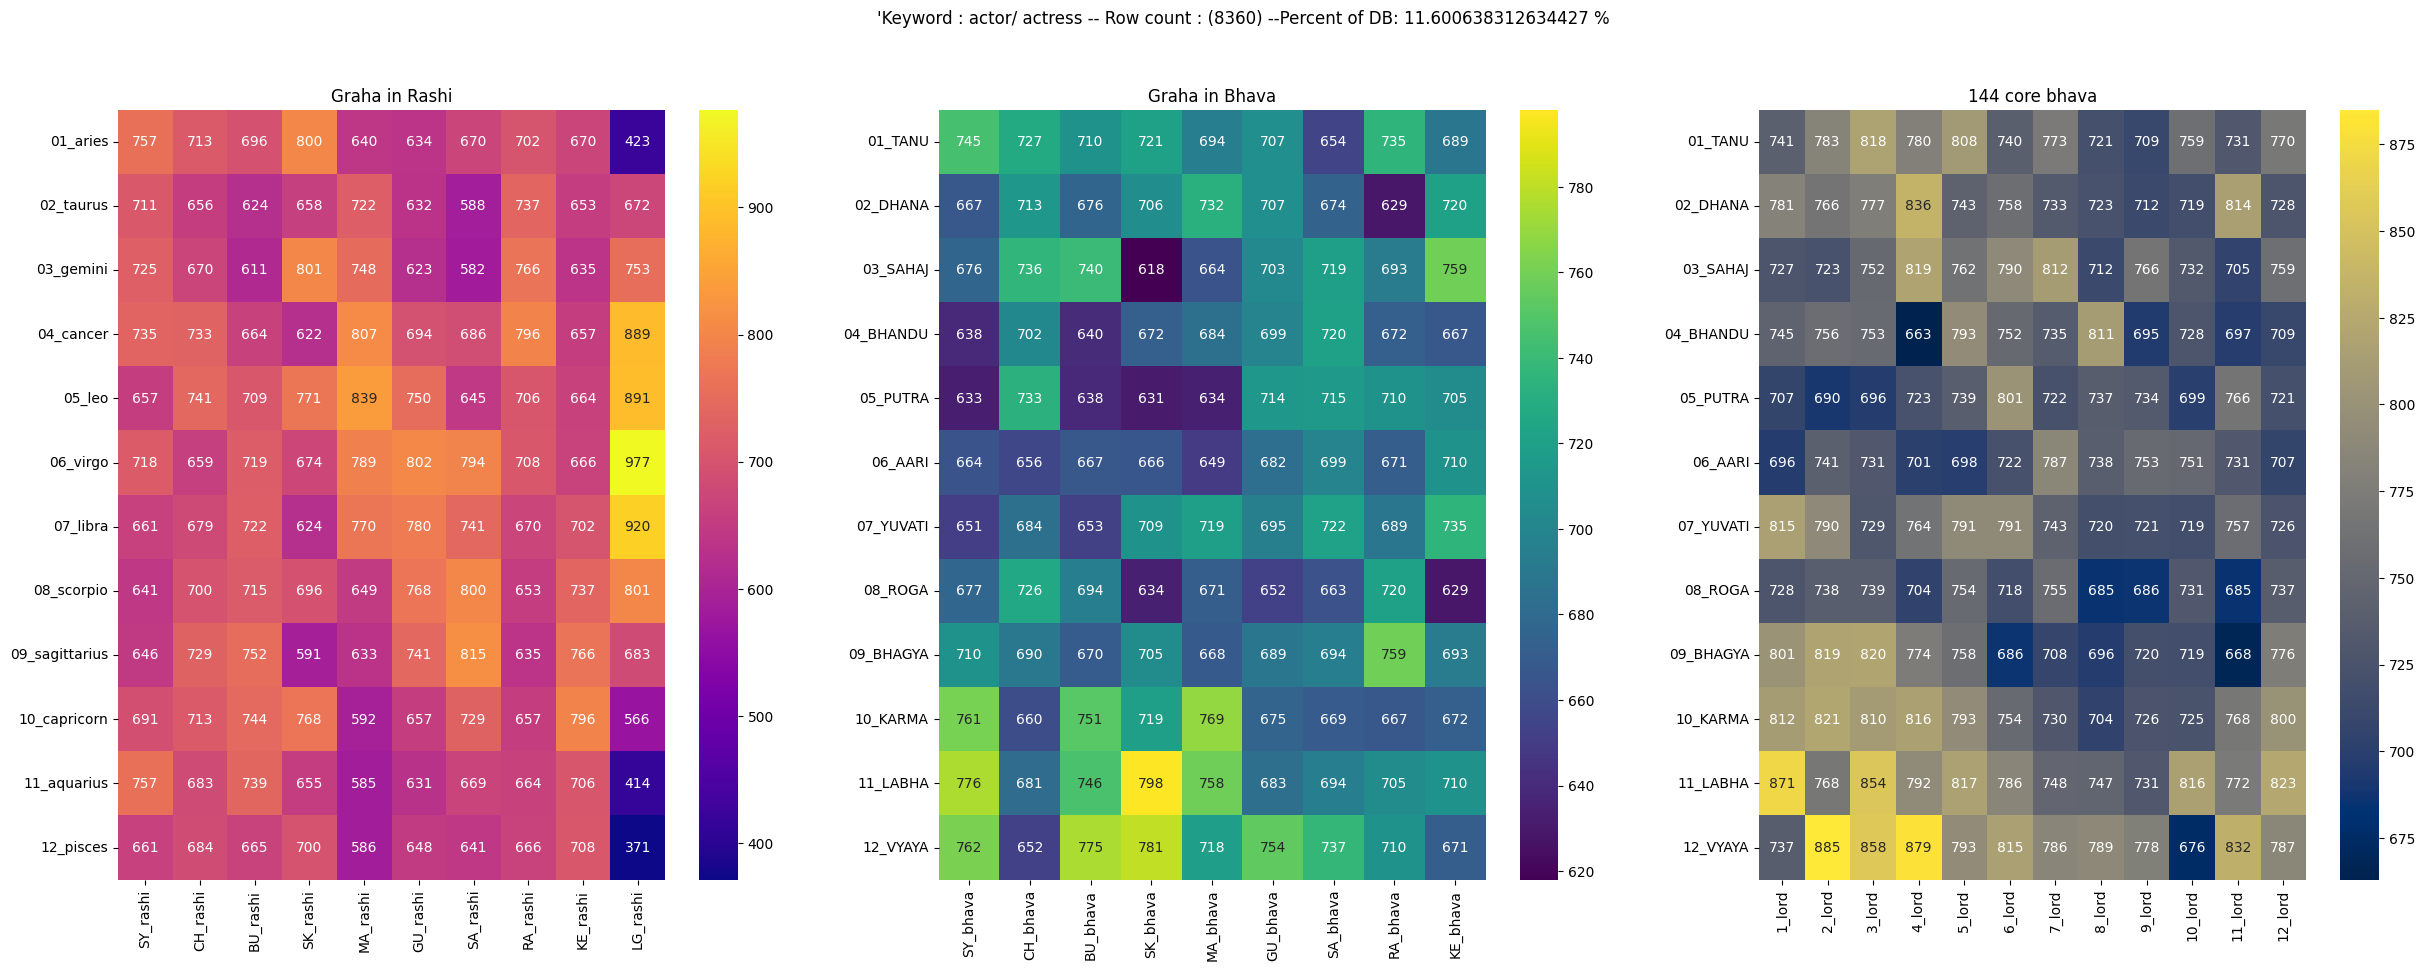

In [24]:
## 4.5 Categories representing Actor/ Actress
executeAnalysis(astro_chart, "actor/ actress")

Number of columns selected : 1
records before filtering : 848
records after filtering : 821
1 : count=848, percent =1.1767	 : Vocation : Sports : Soccer (Eur.Football)
 total matching records : (821) percentange of DB 1.1392492888364671 %
Outliers calculation bounds: 5th percentile: 56.65 --- 95th percentile:95.14999999999999

1_lord :
	1_lord : lower : 05_PUTRA = 55.0
	1_lord : upper : 11_LABHA = 97.0
2_lord :
	2_lord : upper : 10_KARMA = 99.0
3_lord :
	3_lord : upper : 10_KARMA = 98.0
4_lord :
	4_lord : upper : 12_VYAYA = 96.0
8_lord :
	8_lord : lower : 09_BHAGYA = 55.0
11_lord :
	11_lord : upper : 12_VYAYA = 96.0


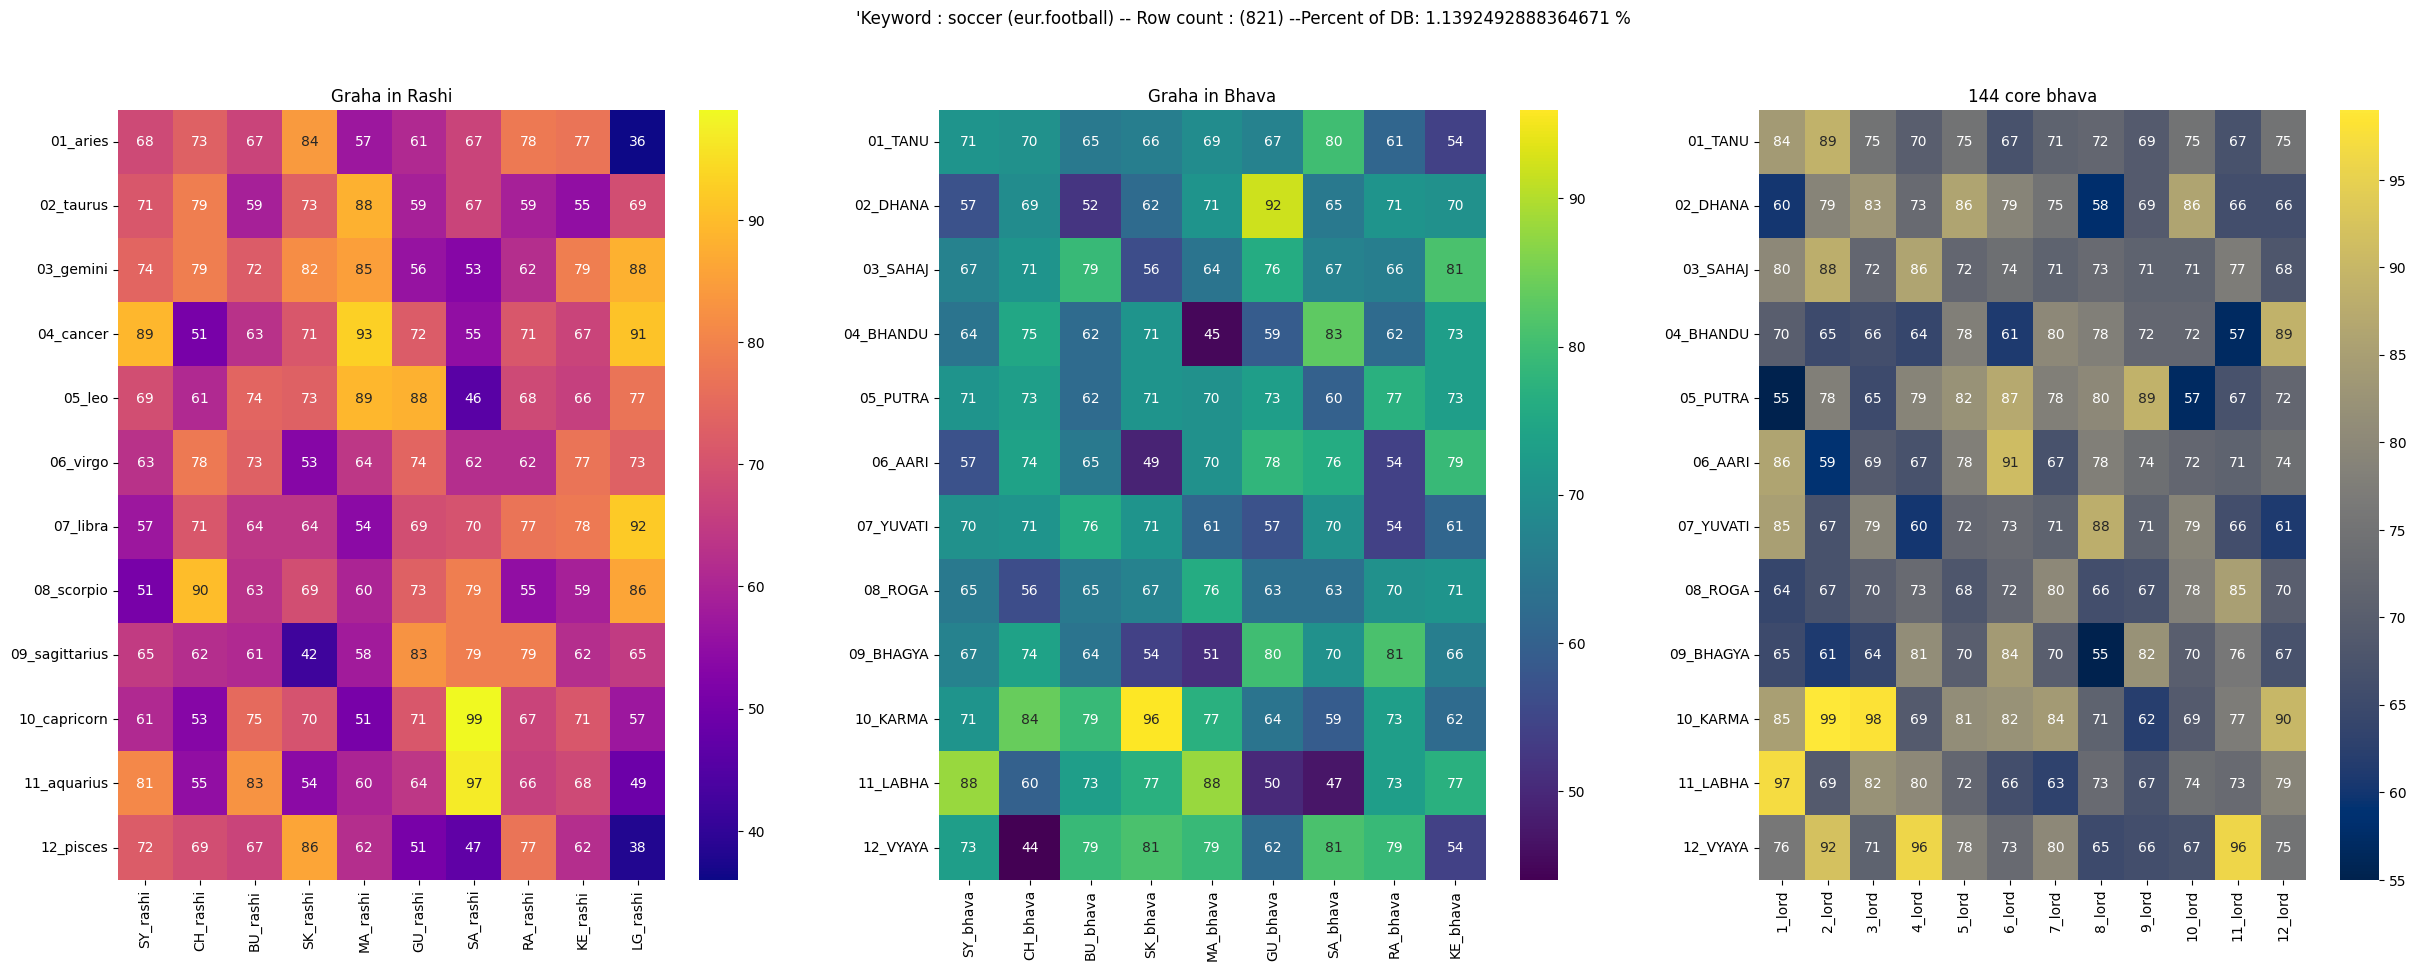

In [25]:
## 4.6 Categories representing Soccer (Eur.Football)
executeAnalysis(astro_chart, "soccer (eur.football)")

Number of columns selected : 1
records before filtering : 2060
records after filtering : 1863
1 : count=2060, percent =2.8585	 : Vocation : Occult Fields : Astrologer
 total matching records : (1863) percentange of DB 2.5851661694303756 %
Outliers calculation bounds: 5th percentile: 137.55 --- 95th percentile:209.8

2_lord :
	2_lord : upper : 12_VYAYA = 216.0
4_lord :
	4_lord : lower : 06_AARI = 135.0
	4_lord : upper : 10_KARMA = 212.0
5_lord :
	5_lord : lower : 05_PUTRA = 137.0
7_lord :
	7_lord : lower : 06_AARI = 136.0
10_lord :
	10_lord : lower : 07_YUVATI = 126.0
11_lord :
	11_lord : lower : 02_DHANA = 136.0


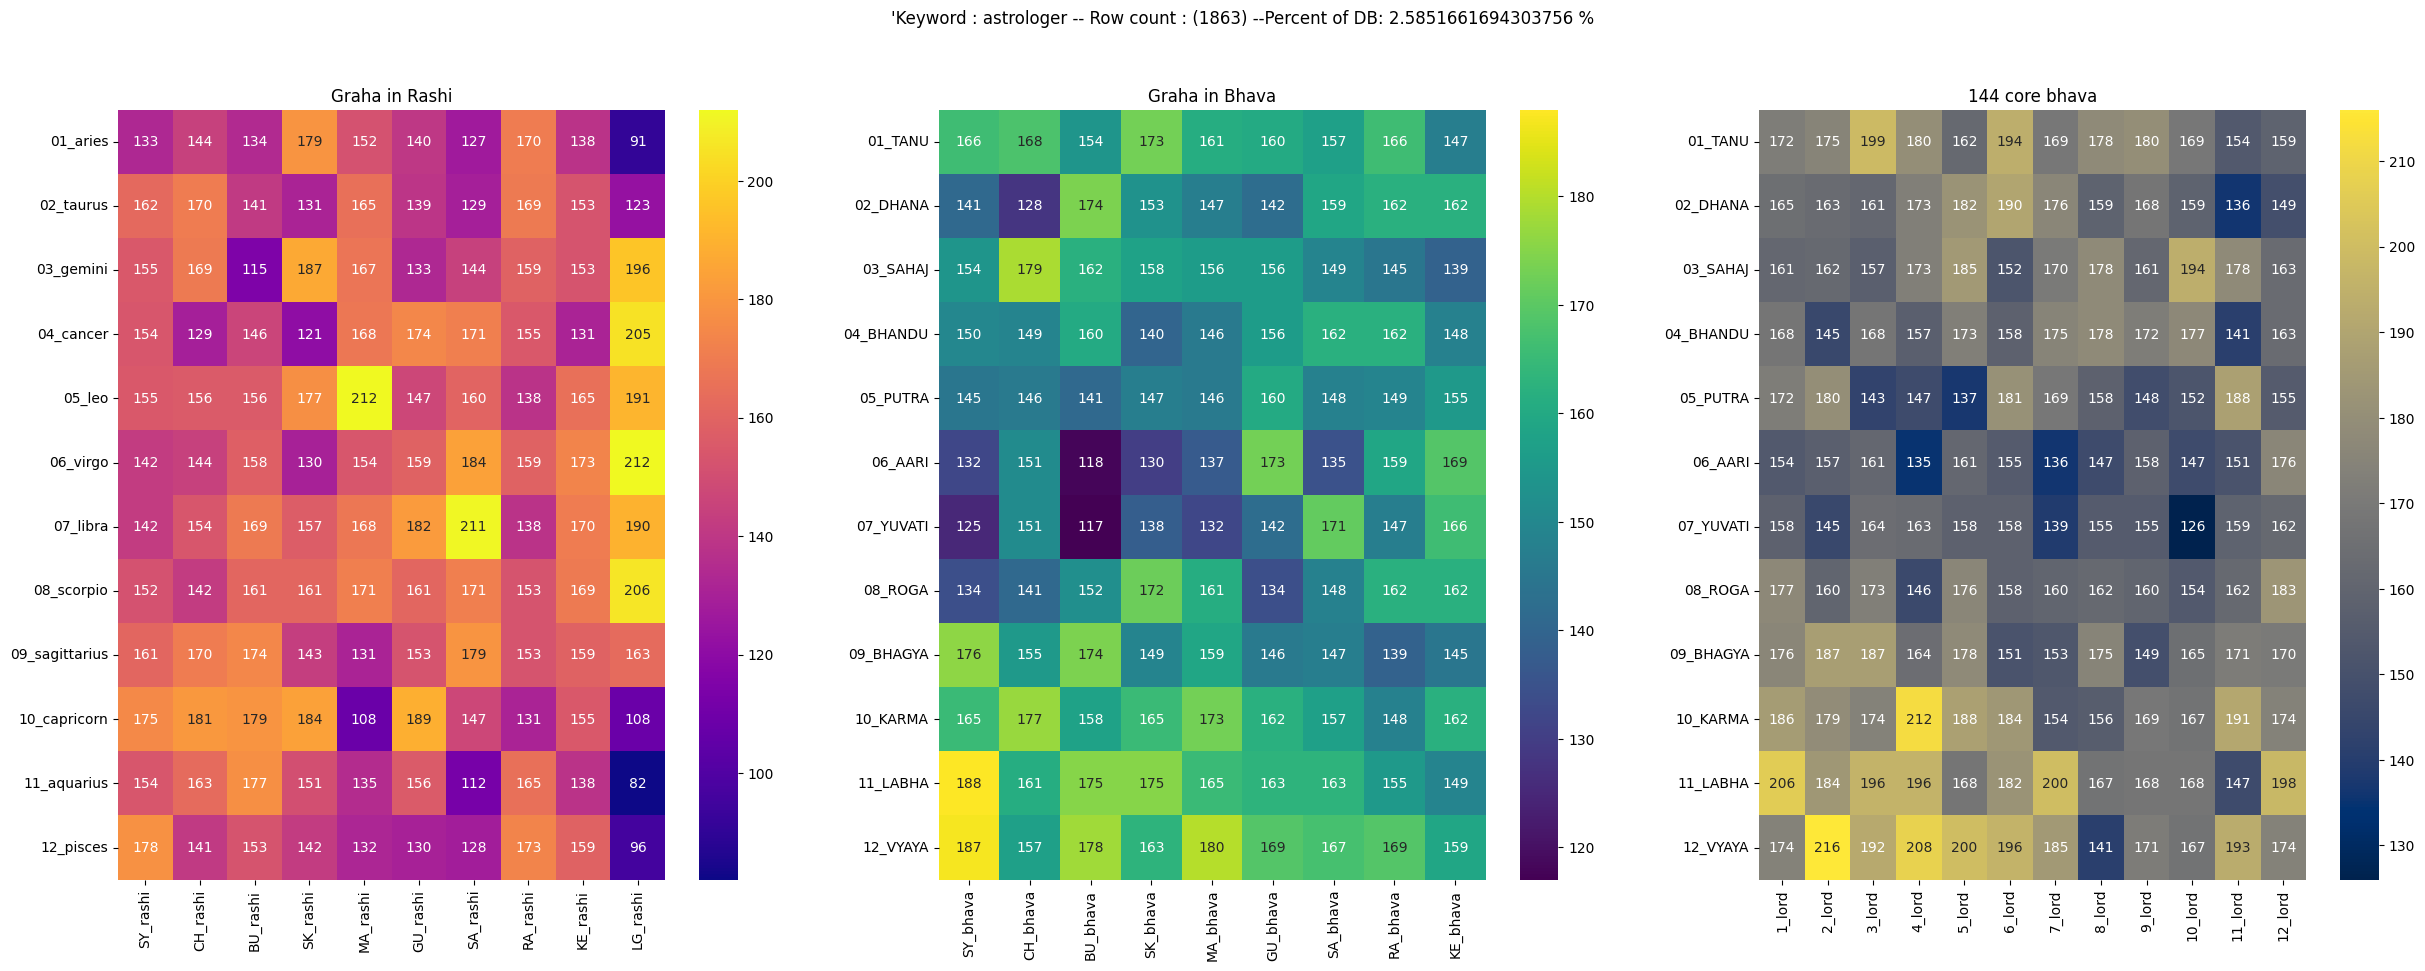

In [26]:
## 4.7 Categories representing Occult Fields : Astrologer
executeAnalysis(astro_chart, "astrologer")

Number of columns selected : 1
records before filtering : 55
records after filtering : 27
1 : count=55, percent =0.0763	 : Vocation : Politics : U.S. Presidents
 total matching records : (27) percentange of DB 0.03746617636855617 %
Outliers calculation bounds: 5th percentile: 0.0 --- 95th percentile:8.349999999999998

12_lord :
	12_lord : lower : 11_LABHA = 0.0
	12_lord : lower : 12_VYAYA = 0.0
	12_lord : upper : 01_TANU = 10.0


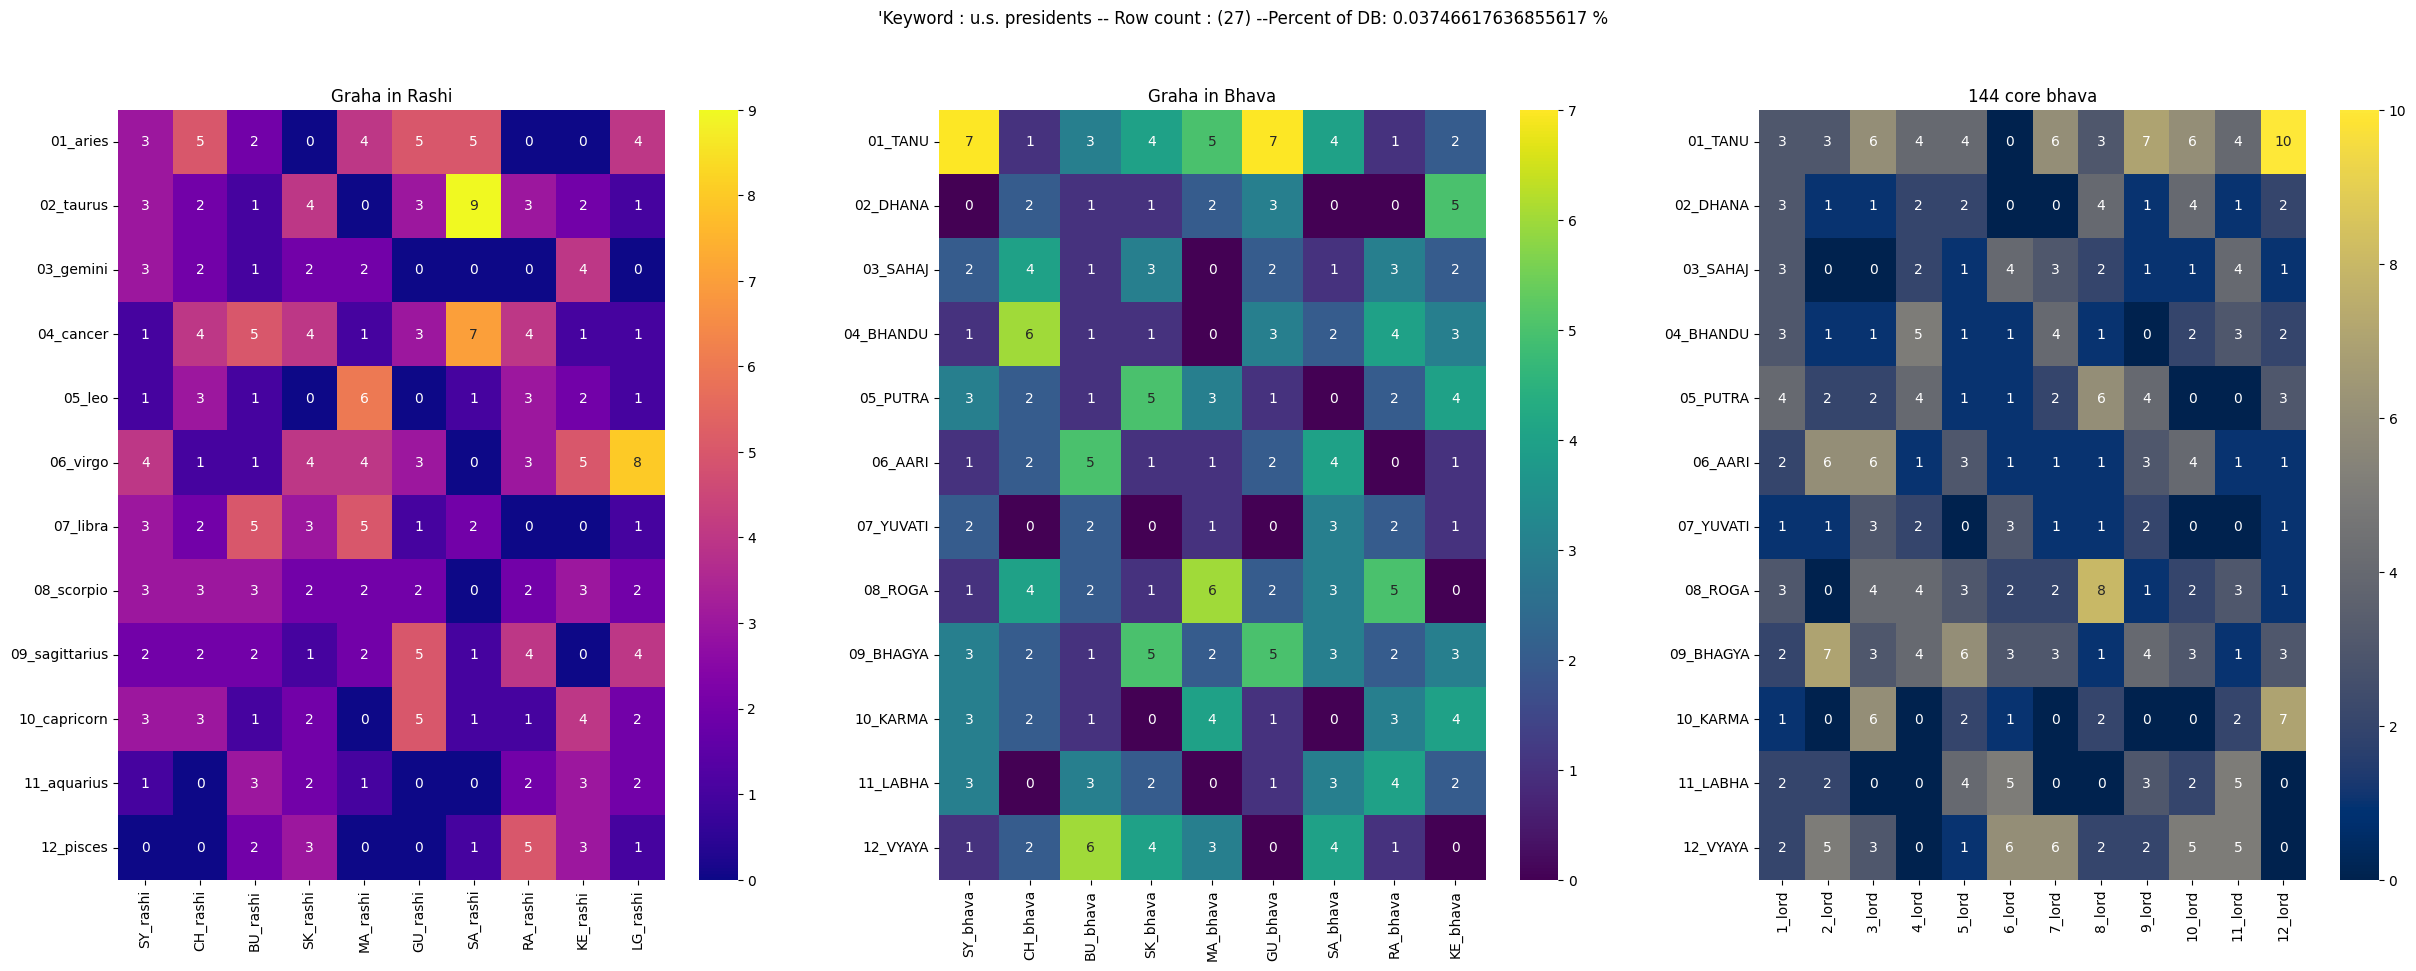

In [27]:
## 4.8 Categories representing Occult Fields : Astrologer
executeAnalysis(astro_chart, "u.s. presidents")

In [28]:
## 4.9 Categories representing cricketer - wont work (scrapping issue)
# executeAnalysis(astro_chart, "cricketer")

Number of columns selected : 1
records before filtering : 1326
records after filtering : 1202
1 : count=1326, percent =1.8400	 : Notable : Awards : Sports Championship
 total matching records : (1202) percentange of DB 1.6679386664816485 %
Outliers calculation bounds: 5th percentile: 87.75 --- 95th percentile:134.29999999999998

2_lord :
	2_lord : lower : 06_AARI = 81.0
	2_lord : upper : 11_LABHA = 137.0
3_lord :
	3_lord : lower : 02_DHANA = 85.0
4_lord :
	4_lord : lower : 08_ROGA = 87.0
6_lord :
	6_lord : upper : 10_KARMA = 142.0


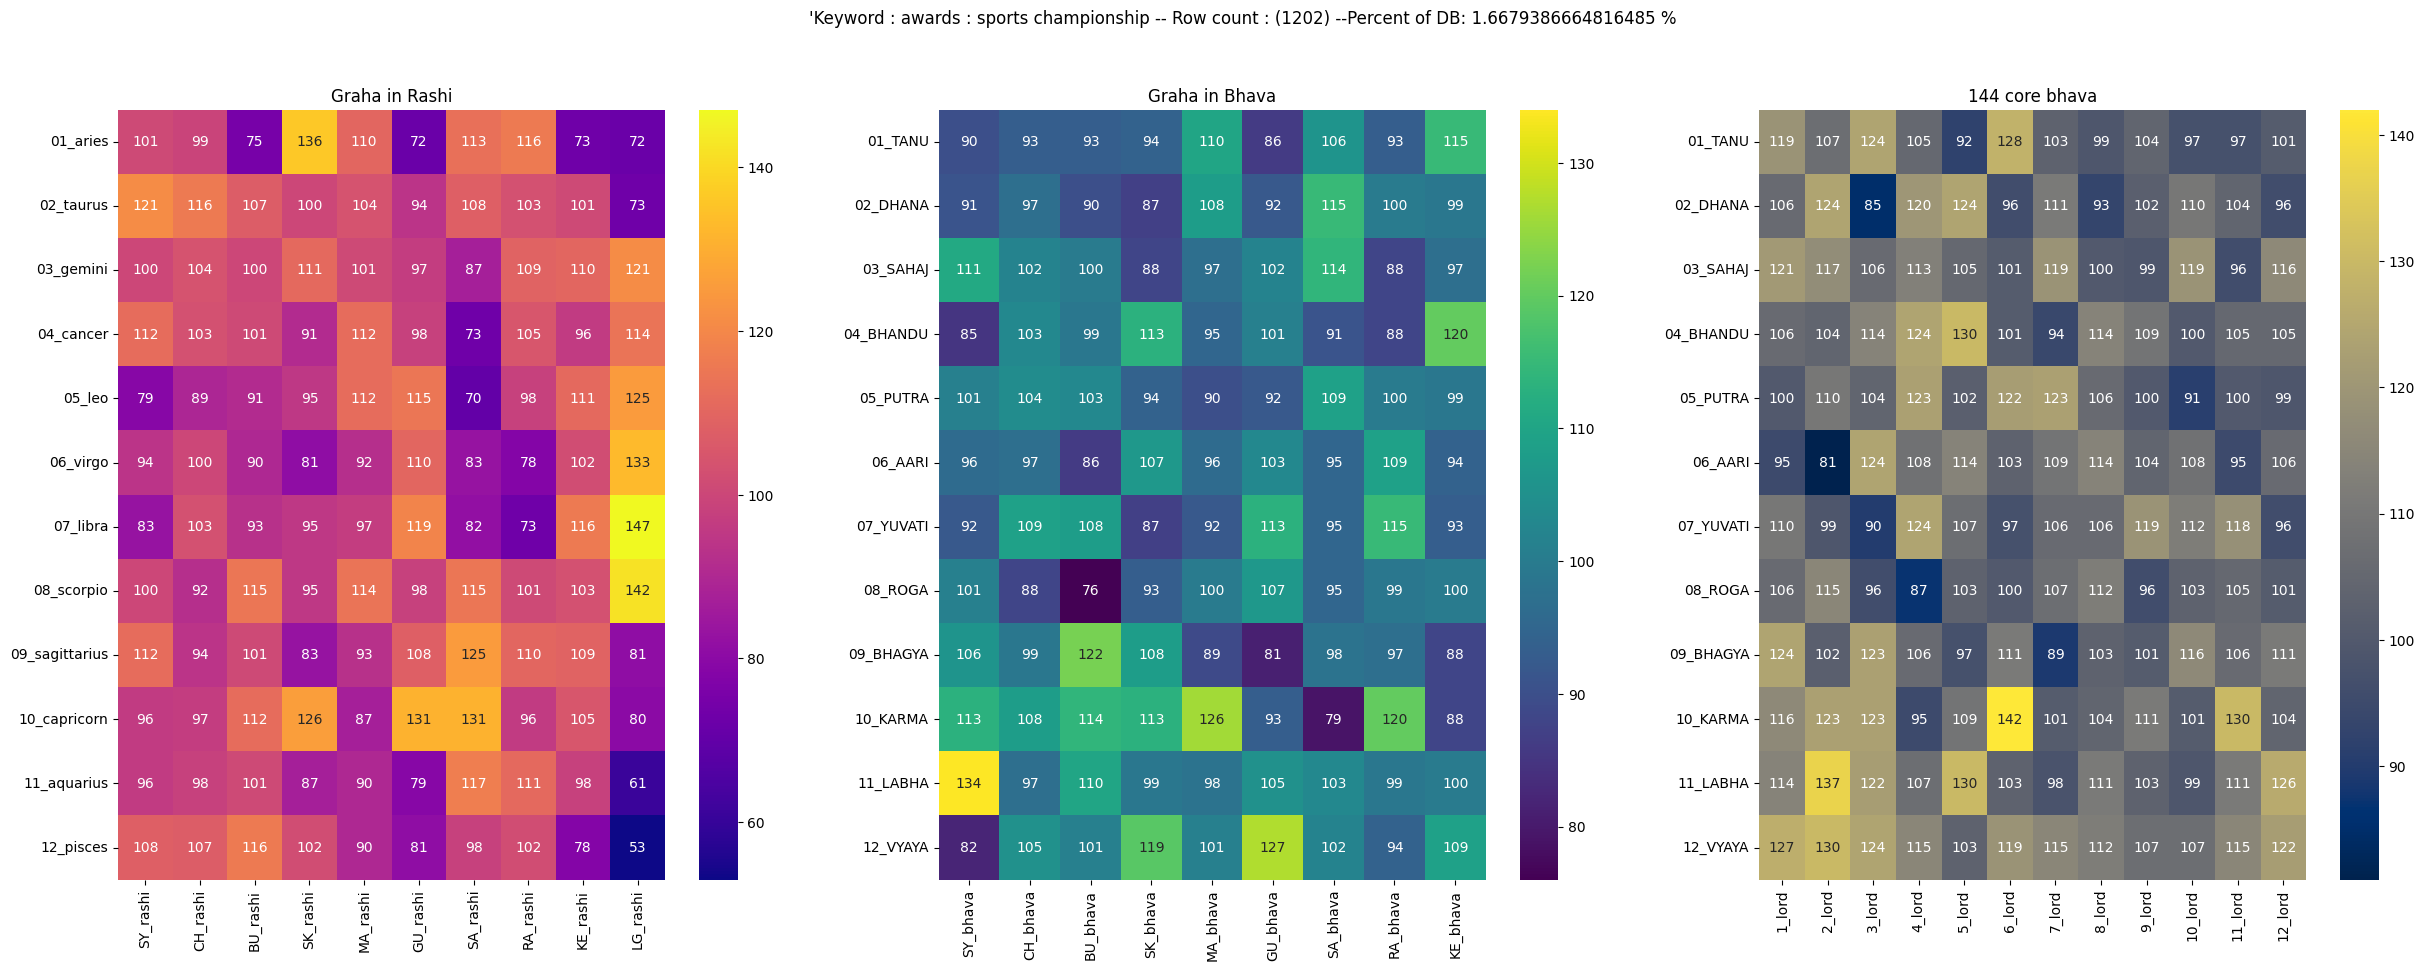

In [29]:
## 4.10 Categories representing - Awards : Sports Championship 
executeAnalysis(astro_chart, "awards : sports championship")